In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import types



The corner points are...

A : [280, 259]
B : [352, 437]
C : [540, 211]
D : [616, 382]


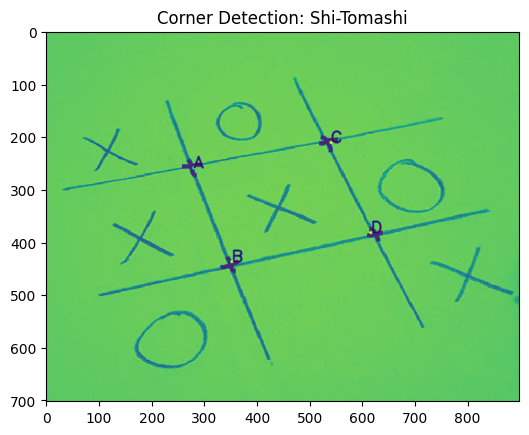

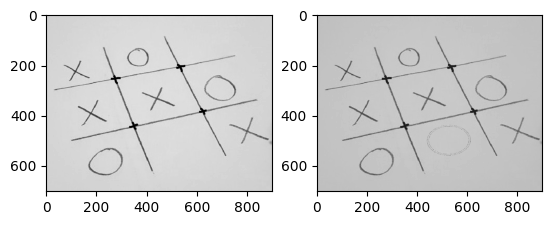

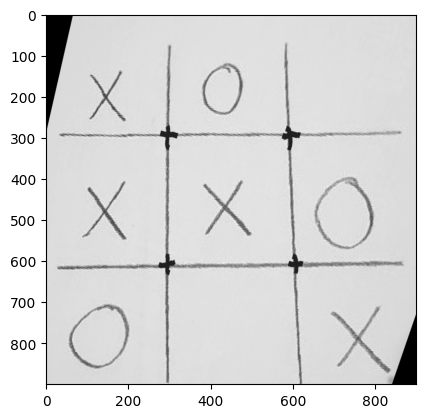

In [50]:
def shi_tomashi(image):
    # gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = image.copy()
    corners = cv2.goodFeaturesToTrack(gray, 4, 0.01, 100)
    corners = np.int0(corners)
    corners = sorted(np.concatenate(corners).tolist())
    print('\nThe corner points are...\n')

    im = image.copy()
    for index, c in enumerate(corners):
        x, y = c
        cv2.circle(im, (x, y), 3, 255, -1)
        character = chr(65 + index)
        print(character, ':', c)
        cv2.putText(im, character, tuple(c), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)

    plt.figure(2)
    plt.imshow(im)
    plt.title('Corner Detection: Shi-Tomashi')
    return corners

img = cv2.imread('test.png',0)

destPoints = [[300,300], [300,600], [600,300], [600,600]]

corners = shi_tomashi(img)
mat = cv2.getPerspectiveTransform(np.float32(corners), np.float32(destPoints))

warped = cv2.warpPerspective(img, mat, (900, 900))

data = np.uint8([[0]*900]*900)
data = cv2.circle(data, (450, 750), 90, (255,0,0), 5)

warpedData = cv2.warpPerspective(data, np.linalg.inv(mat), (img.shape[1], img.shape[0]))

plt.figure(1)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
# plt.imshow(warped, cmap='gray')
# plt.imshow(warpedData, cmap='gray')
plt.imshow(img+warpedData, cmap='gray')

plt.figure(3)
plt.imshow(warped, cmap='gray')

plt.show()

In [51]:

# #create a 2d array to hold the gamestate
# gamestate = [["-","-","-"],["-","-","-"],["-","-","-"]]

# #kernel used for noise removal
# kernel =  np.ones((7,7),np.uint8)
# # Load a color image 
# img = warped
# # get the image width and height
# img_width = img.shape[0]
# img_height = img.shape[1]

# # turn into grayscale
# img_g =  warped
# # turn into thresholded binary
# ret,thresh1 = cv2.threshold(img_g,100,255,cv2.THRESH_BINARY)
# #remove noise from binary
# thresh1 = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)

# #find and draw contours. RETR_EXTERNAL retrieves only the extreme outer contours
# contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(img, contours, -1, (0,255,0), 15)

# tileCount = 0
# for cnt in contours:
#         # ignore small contours that are not tiles
#         if cv2.contourArea(cnt) > 200000: 
#                 tileCount = tileCount+1
#                 # use boundingrect to get coordinates of tile
#                 x,y,w,h = cv2.boundingRect(cnt)
#                 # create new image from binary, for further analysis. Trim off the edge that has a line
#                 tile = thresh1[x+40:x+w-80,y+40:y+h-80]
#                 # create new image from main image, so we can draw the contours easily
#                 imgTile = img[x+40:x+w-80,y+40:y+h-80]

#                 #determine the array indexes of the tile
#                 tileX = round((x/img_width)*3)
#                 tileY = round((y/img_height)*3)     

#                 # find contours in the tile image. RETR_TREE retrieves all of the contours and reconstructs a full hierarchy of nested contours.
#                 c, hierarchy = cv2.findContours(tile, cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
#                 for ct in c:
#                         # to prevent the tile finding itself as contour
#                         if cv2.contourArea(ct) < 180000:
#                                 cv2.drawContours(imgTile, [ct], -1, (255,0,0), 15)
#                                 #calculate the solitity
#                                 area = cv2.contourArea(ct)
#                                 hull = cv2.convexHull(ct)
#                                 hull_area = cv2.contourArea(hull)
#                                 solidity = float(area)/hull_area

#                                 # fill the gamestate with the right sign
#                                 if(solidity > 0.5):
#                                         gamestate[tileX][tileY] = "O"
#                                 else: 
#                                         gamestate[tileX][tileY] = "X"
#                 # put a number in the tile
#                 cv2.putText(img, str(tileCount), (x+200,y+300), cv2.FONT_HERSHEY_SIMPLEX, 10, (0,0,255), 20)

# #print the gamestate
# print("Gamestate:")
# for line in gamestate:
#         linetxt = ""
#         for cel in line:
#                 linetxt = linetxt + "|" + cel
#         print(linetxt)

# # resize final image
# res = cv2.resize(img,None,fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)

# # display image and release resources when key is pressed
# plt.imshow(res, cmap='gray')

# cv2.imshow('image1',res)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

x--Matchin Points--50--0
x--Matchin Points--45--1
x--Matchin Points--47--3
x--Matchin Points--54--4
x--Matchin Points--43--5
x--Matchin Points--33--6
x--Matchin Points--52--8
[['X' None None]
 ['X' 'X' None]
 [None None 'X']]


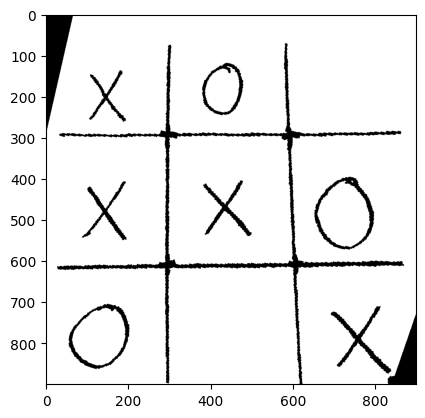

In [52]:
import cv2
x_img = cv2.imread('x.png', 0)
o_img = cv2.imread('o.png', 0)
game_state = np.empty((3,3),dtype= 'object')

th, warped = cv2.threshold(warped, 172, 255, cv2.THRESH_BINARY)
plt.imshow(warped, cmap='gray')

img2 = warped[0:300, 0:300]
orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(x_img, None)
kp2, des2 = orb.detectAndCompute(o_img, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
destPoints = [[300,300], [300,600], [600,300], [600,600]]
NoneType=type(None)

kp_x, des_x = orb.detectAndCompute(x_img, None)
kp_o, des_o = orb.detectAndCompute(o_img, None)
count=0
intersec_coords =[300,600,900]
for i in range(len(intersec_coords)):
	for j in range(len(intersec_coords)):
		img2 = warped[intersec_coords[i]-300:intersec_coords[i], intersec_coords[j]-300:intersec_coords[j]]
		rb = cv2.ORB_create(nfeatures=500)
		kp2, des2 = orb.detectAndCompute(img2, None)
	
		if type(des_x)!=NoneType and type(des2)!=NoneType:
			bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
			matches = bf.match(des_x, des2)
			matches = sorted(matches, key=lambda x: x.distance)
			#matches_o = bf.match(des_o, des2)
			# matches_o = sorted(matches_o, key=lambda x: x.distance)
			print("x--Matchin Points--"+str(len(matches))+"--"+str(count))
			if(len(matches)>46):
				game_state[i][j]="X"
			match_img = cv2.drawMatches(x_img, kp1, img2, kp2, matches[:50], None)
			# cv2.imshow('original image', x_img)
			# cv2.imshow('test image', img2)
			# cv2.imshow('Matches', match_img)
			# cv2.waitKey(2000)
			# cv2.destroyAllWindows()
		# if type(des_o)!=NoneType and type(des2)!=NoneType:
		# 	bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
		# 	matches = bf.match(des_o, des2)
		# 	matches = sorted(matches, key=lambda x: x.distance)
		# 	print("o"+str(len(matches))+"--"+str(count))
		# 	#match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)
		# 	#cv2.imshow('original image', img1)
		# 	cv2.imshow('test image', img2)
		# 	#cv2.imshow('Matches', match_img)
		# 	#cv2.waitKey(2000)
		# 	cv2.destroyAllWindows()
		count+=1

print(game_state)
